In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rotten_tomatoes = pd.read_csv("C:/Users/DELL/projects/rotten_tomatoes_movies.csv/rotten_tomatoes_movies.csv")
rotten_tomatoes.head(2)


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [3]:
genre_counts = rotten_tomatoes['genres'].str.split(", ", expand= True).stack().value_counts()
genre_counts

Drama                        9542
Comedy                       5674
Action & Adventure           3551
Mystery & Suspense           3534
Art House & International    2499
Documentary                  2067
Horror                       2043
Romance                      1916
Science Fiction & Fantasy    1865
Classics                     1649
Special Interest             1242
Kids & Family                1116
Musical & Performing Arts    1013
Animation                     629
Western                       301
Television                    270
Sports & Fitness              178
Cult Movies                   104
Faith & Spirituality           79
Gay & Lesbian                  78
Anime & Manga                  19
Name: count, dtype: int64

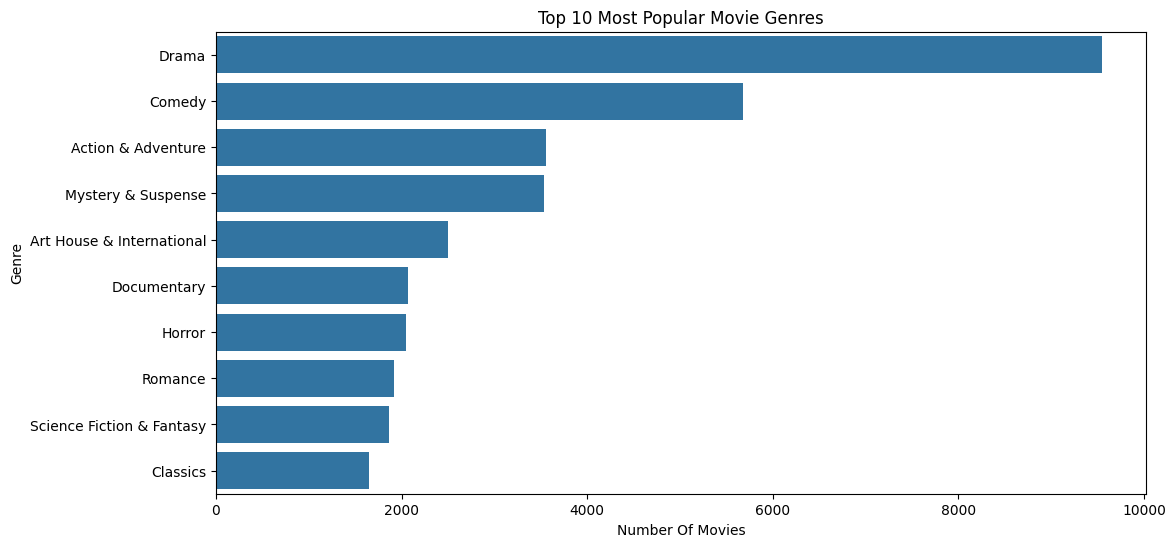

In [ ]:
plt.figure(figsize= (12,6))
sns.barplot(x= genre_counts.head(10).values, y= genre_counts.head(10).index)
plt.title("Top 10 Most Popular Movie Genres")
plt.xlabel("Number Of Movies")
plt.ylabel("Genre");

In [5]:
print("The Top 10 Most Popular Genres")
genre_counts.head(10)

The Top 10 Most Popular Genres


Drama                        9542
Comedy                       5674
Action & Adventure           3551
Mystery & Suspense           3534
Art House & International    2499
Documentary                  2067
Horror                       2043
Romance                      1916
Science Fiction & Fantasy    1865
Classics                     1649
Name: count, dtype: int64

In [47]:
# Calculating the average tomatometer rating for each director
director_ratings = rotten_tomatoes.groupby("directors")["tomatometer_rating"].agg(["mean", "count"]).reset_index()
# Filtering directors with at least 10 movies
director_ratings = director_ratings[director_ratings["count"] >= 10]
# Sorting the directors by average rating in descending order
director_ratings = director_ratings.sort_values("mean", ascending= False)

print("Top 10 Directors by Average Tomatometer Rating ")
print(director_ratings.head(10))


Top 10 Directors by Average Tomatometer Rating 
                 directors       mean  count
148         Akira Kurosawa  94.181818     11
3281        Hayao Miyazaki  92.600000     10
8789         William Wyler  92.388889     18
951           Billy Wilder  90.500000     16
623           Anthony Mann  90.100000     10
7902       Stanley Kubrick  89.461538     13
7581              Sam Wood  89.000000     10
6480          Orson Welles  88.900000     10
4564  Joseph L. Mankiewicz  88.545455     11
2991          George Cukor  88.315789     19


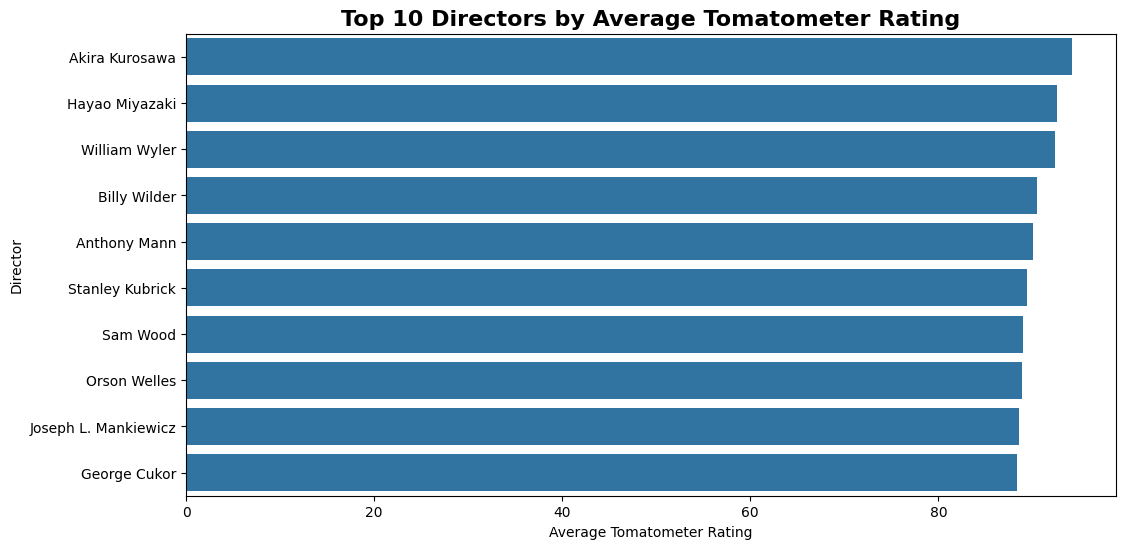

In [48]:
# Creating a bar plot to visualize the top 10 directors by average tomatometer rating
plt.figure(figsize= (12,6))
sns.barplot(x= "mean", y= "directors", data= director_ratings.head(10))
plt.title("Top 10 Directors by Average Tomatometer Rating", fontsize= 16, fontweight= "bold")
plt.xlabel("Average Tomatometer Rating")
plt.ylabel("Director");



In [27]:
# Changing the release date to a datetime object and extracting the year
rotten_tomatoes["year"] = pd.to_datetime(rotten_tomatoes["original_release_date"]).dt.year

# Grouping by year and calculating the mean and count of tomatometer ratings
yearly_ratings = rotten_tomatoes.groupby("year")["tomatometer_rating"].agg(["mean", "count"]).reset_index()

# Filtering years with at least 10 movies
yearly_ratings = yearly_ratings[yearly_ratings["count"] >= 10]

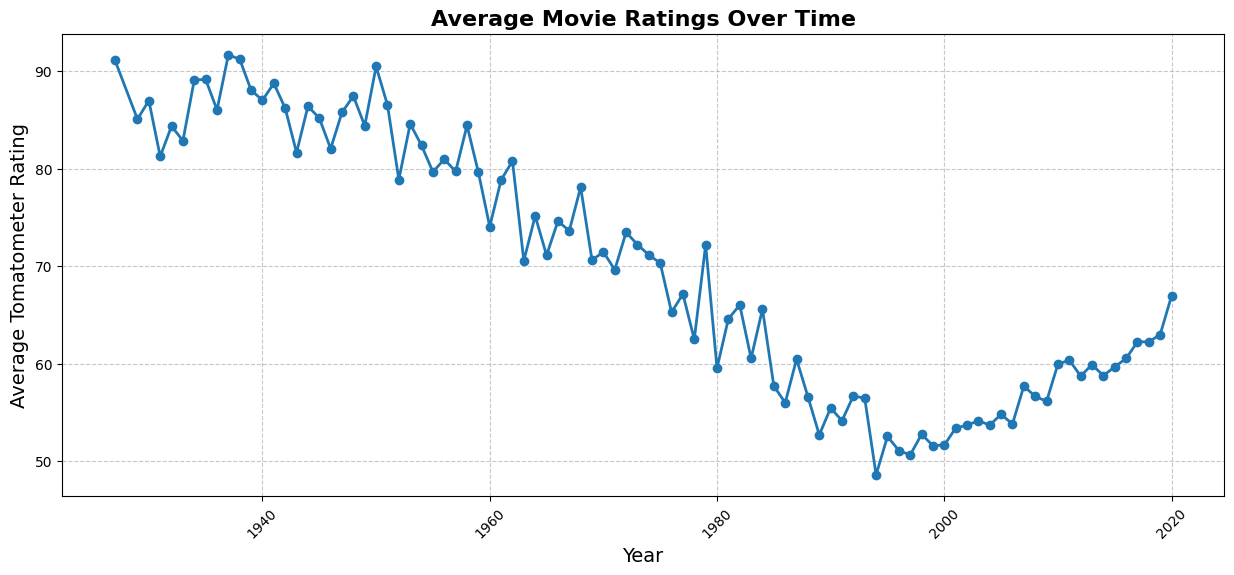

In [32]:
plt.figure(figsize=(15, 6))
plt.plot(yearly_ratings["year"], yearly_ratings['mean'], marker='o', linestyle='-', linewidth=2)
plt.title('Average Movie Ratings Over Time', fontsize= 16, fontweight= "bold")
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Average Tomatometer Rating', fontsize= 14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45);


In [34]:
print("\nSummary of Ratings Over Time")
print(f"Overall average rating: {rotten_tomatoes['tomatometer_rating'].mean():.2f}")
print(f"Highest average rating year: {yearly_ratings.loc[yearly_ratings['mean'].idxmax(), 'year']} ({yearly_ratings['mean'].max():.2f})")
print(f"Lowest average rating year: {yearly_ratings.loc[yearly_ratings['mean'].idxmin(), 'year']} ({yearly_ratings['mean'].min():.2f})")


Summary of Ratings Over Time
Overall average rating: 60.88
Highest average rating year: 1937.0 (91.70)
Lowest average rating year: 1994.0 (48.59)


In [43]:
rotten_tomatoes['decade'] = (rotten_tomatoes['year'] // 10) * 10
decade_ratings = rotten_tomatoes.groupby('decade')['tomatometer_rating'].mean().reset_index()
print("\nAverage Ratings by Decade")
print(decade_ratings)


Average Ratings by Decade
    decade  tomatometer_rating
0   1910.0           94.000000
1   1920.0           91.307692
2   1930.0           87.275000
3   1940.0           85.578462
4   1950.0           82.707207
5   1960.0           74.721202
6   1970.0           69.660763
7   1980.0           59.451269
8   1990.0           52.666031
9   2000.0           54.890567
10  2010.0           60.444089
11  2020.0           66.953307
